<a href="https://colab.research.google.com/github/Krish6115/MLLab/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# =============================== #
#         A1: Solving Linear System and Pricing
# =============================== #
import numpy as np

A = np.array([
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4]
])
C = np.array([386, 289, 393, 110, 280, 167, 271, 274, 148, 198])
rank_A = np.linalg.matrix_rank(A)
A_pinv = np.linalg.pinv(A)
X = A_pinv.dot(C)
print("Rank of A:", rank_A)
print("Cost Vector X (Prices):")
print("Candy price: Rs", round(X[0], 2))
print("Mango price: Rs", round(X[1], 2))
print("Milk Packet price: Rs", round(X[2], 2))

Rank of A: 3
Cost Vector X (Prices):
Candy price: Rs 1.0
Mango price: Rs 55.0
Milk Packet price: Rs 18.0


In [ ]:
# =============================== #
#         A2: Logistic Regression Classification (RICH/POOR)
# =============================== #
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.array([
    [20, 6, 2],
    [16, 3, 6],
    [27, 6, 2],
    [19, 1, 2],
    [24, 4, 2],
    [22, 1, 5],
    [15, 4, 2],
    [18, 4, 2],
    [21, 1, 4],
    [16, 2, 4]
])
payments = np.array([386, 289, 393, 110, 280, 167, 271, 274, 148, 198])
y = np.where(payments > 200, 1, 0)  # 1 = RICH, 0 = POOR

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy * 100, 2), "%")

all_preds = clf.predict(X)
for i, label in enumerate(all_preds):
    status = "RICH" if label == 1 else "POOR"
    print(f"Customer C_{i+1} is classified as: {status}")


Accuracy: 66.67 %
Customer C_1 is classified as: RICH
Customer C_2 is classified as: POOR
Customer C_3 is classified as: RICH
Customer C_4 is classified as: POOR
Customer C_5 is classified as: RICH
Customer C_6 is classified as: POOR
Customer C_7 is classified as: RICH
Customer C_8 is classified as: RICH
Customer C_9 is classified as: POOR
Customer C_10 is classified as: POOR


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lab Session Data(IRCTC Stock Price).csv to Lab Session Data(IRCTC Stock Price).csv
Saving Lab Session Data(thyroid0387_UCI).csv to Lab Session Data(thyroid0387_UCI).csv


Mean of Price (Population): 1560.663453815261
Variance of Price: 58732.365352539186
Sample Mean of Wednesday Prices: 1550.706
Difference from Population Mean: -9.957453815261033
Sample Mean of April Prices: 1698.9526315789474
Difference from Population Mean: 138.28917776368644
Probability of making a loss (Chg% < 0): 0.4980
Probability of profit on Wednesday: 0.4200
Conditional Probability P(Profit | Wednesday): 0.4200


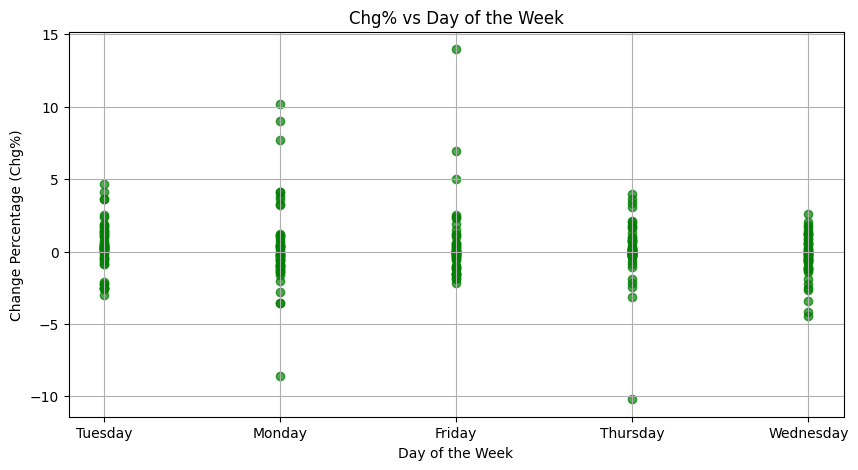

In [ ]:
# =============================== #
#         A3: IRCTC Stock Price Analysis and Probability
# =============================== #
import pandas as pd
import statistics
import matplotlib.pyplot as plt

file_path = r"Lab Session Data(IRCTC Stock Price).csv"
df = pd.read_csv(file_path)

df.columns = df.columns.str.strip()

# Clean and convert 'Price' column to numeric
df['Price'] = df['Price'].astype(str).str.replace(',', '', regex=False)
price_data = pd.to_numeric(df['Price'], errors='coerce')
price_data = price_data.dropna() # Remove rows with NaN values after conversion

mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)
print(f"Mean of Price (Population): {mean_price}")
print(f"Variance of Price: {variance_price}")

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()

# Ensure 'Price' column is numeric before filtering by day
wednesday_prices = price_data[df['Day'] == 'Wednesday']
mean_wednesday = statistics.mean(wednesday_prices)
print(f"Sample Mean of Wednesday Prices: {mean_wednesday}")
print(f"Difference from Population Mean: {mean_wednesday - mean_price}")

# Ensure 'Price' column is numeric before filtering by month
april_prices = price_data[df['Date'].dt.month == 4]
mean_april = statistics.mean(april_prices)
print(f"Sample Mean of April Prices: {mean_april}")
print(f"Difference from Population Mean: {mean_april - mean_price}")

# Clean and convert 'Chg%' column to numeric
df['Chg%'] = df['Chg%'].astype(str).str.replace('%', '', regex=False)
chg_data = pd.to_numeric(df['Chg%'], errors='coerce')
chg_data = chg_data.dropna() # Remove rows with NaN values after conversion

# Align df and chg_data for plotting
df_aligned = df.loc[chg_data.index]


loss_count = sum(map(lambda x: x < 0, chg_data.dropna()))
total_count = chg_data.dropna().count()
prob_loss = loss_count / total_count
print(f"Probability of making a loss (Chg% < 0): {prob_loss:.4f}")

wednesday_chg = chg_data[df_aligned['Day'] == 'Wednesday']
profit_wednesday = sum(wednesday_chg > 0)
total_wednesday = wednesday_chg.count()
prob_profit_wed = profit_wednesday / total_wednesday
print(f"Probability of profit on Wednesday: {prob_profit_wed:.4f}")

print(f"Conditional Probability P(Profit | Wednesday): {prob_profit_wed:.4f}")

plt.figure(figsize=(10, 5))
plt.scatter(df_aligned['Day'], chg_data, alpha=0.7, color='green')
plt.title('Chg% vs Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Change Percentage (Chg%)')
plt.grid(True)
plt.show()


[Basic Info and Data Types]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 no

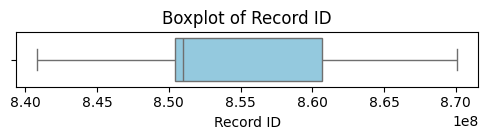

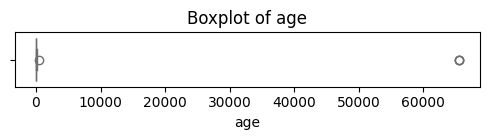


[Mean and Std Dev of Numeric Columns]
Record ID: Mean = 852947346.61, Std Dev = 7581968.78
age: Mean = 73.56, Std Dev = 1183.98


In [ ]:
# =============================== #
#         A4: Categorical & Numeric Data Analysis (Thyroid Dataset)
# =============================== #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

file_path = r"Lab Session Data(thyroid0387_UCI).csv"
df = pd.read_csv(file_path)

print("\n[Basic Info and Data Types]")
print(df.info())
print("\n[First 5 Rows of Data]")
print(df.head())

print("\n[Categorical Columns]")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
print("\n[Numeric Columns]")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(numeric_cols)

print("\n[Value Counts for Categorical Variables]")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

print("\n[Encoding Suggestions]")
for col in categorical_cols:
    unique_vals = df[col].dropna().unique()
    print(f"{col}: {len(unique_vals)} unique values → {'Ordinal (Label Encoding)' if 'low' in unique_vals or 'high' in unique_vals else 'Nominal (One-Hot Encoding)'}")

print("\n[Range of Numeric Columns]")
for col in numeric_cols:
    print(f"{col}: Min = {df[col].min()}, Max = {df[col].max()}")

print("\n[Missing Values in Each Column]")
print(df.isnull().sum())

print("\n[Outlier Detection Using Boxplots]")
for col in numeric_cols:
    plt.figure(figsize=(5, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

print("\n[Mean and Std Dev of Numeric Columns]")
for col in numeric_cols:
    mean = df[col].mean()
    std_dev = df[col].std()
    print(f"{col}: Mean = {mean:.2f}, Std Dev = {std_dev:.2f}")


In [ ]:
# =============================== #
#         A5: Jaccard Coefficient & SMC for Binary Attributes (First Two Rows)
# =============================== #
import pandas as pd
import numpy as np

file_path = r"Lab Session Data(thyroid0387_UCI).csv"
df = pd.read_csv(file_path)

row1 = df.iloc[0]
row2 = df.iloc[1]

# Identify binary-like columns (containing only 'f', 't', or '?')
binary_cols = []
for col in df.columns:
    unique_vals = df[col].dropna().unique()
    # Check if unique values are a subset of {'f', 't', '?'}
    if set(unique_vals).issubset({'f', 't', '?'}) or set(unique_vals).issubset({0, 1}):
        binary_cols.append(col)

print(f"Binary-like Columns Used: {binary_cols}")

# Select binary-like columns for the first two rows and convert 'f' to 0 and 't' to 1, handle '?'
vec1 = row1[binary_cols].replace({'f': 0, 't': 1, '?': -1}).astype(int) # Replace '?' with -1 for now
vec2 = row2[binary_cols].replace({'f': 0, 't': 1, '?': -1}).astype(int) # Replace '?' with -1 for now

# Filter out columns where either row has a missing value ('?') represented by -1
valid_cols = vec1[(vec1 != -1) & (vec2 != -1)].index
vec1_cleaned = vec1[valid_cols]
vec2_cleaned = vec2[valid_cols]

f11 = sum((vec1_cleaned == 1) & (vec2_cleaned == 1))
f00 = sum((vec1_cleaned == 0) & (vec2_cleaned == 0))
f10 = sum((vec1_cleaned == 1) & (vec2_cleaned == 0))
f01 = sum((vec1_cleaned == 0) & (vec2_cleaned == 1))

jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0
smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0

print("\n🔍 Similarity Comparison between First Two Binary Vectors:")
print(f"f11 = {f11}, f00 = {f00}, f10 = {f10}, f01 = {f01}")
print(f"Jaccard Coefficient (JC) = {jc:.4f}")
print(f"Simple Matching Coefficient (SMC) = {smc:.4f}")

print("\n📌 Observation:")
if jc > smc:
    print("JC > SMC → JC emphasizes on positive matches (1s), better for sparse binary data.")
elif smc > jc:
    print("SMC > JC → SMC considers both 0 and 1 matches, useful when 0s are also meaningful.")
else:
    print("JC and SMC are equal — rare, implies balanced match across 1s and 0s.")

Binary-like Columns Used: ['on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']

🔍 Similarity Comparison between First Two Binary Vectors:
f11 = 1, f00 = 16, f10 = 1, f01 = 2
Jaccard Coefficient (JC) = 0.2500
Simple Matching Coefficient (SMC) = 0.8500

📌 Observation:
SMC > JC → SMC considers both 0 and 1 matches, useful when 0s are also meaningful.


/tmp/ipython-input-2497480771.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vec1 = row1[binary_cols].replace({'f': 0, 't': 1, '?': -1}).astype(int) # Replace '?' with -1 for now
/tmp/ipython-input-2497480771.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  vec2 = row2[binary_cols].replace({'f': 0, 't': 1, '?': -1}).astype(int) # Replace '?' with -1 for now


In [ ]:
# =============================== #
#         A6: Cosine Similarity for First Two Numeric Observations
# =============================== #
import pandas as pd
from numpy import dot
from numpy.linalg import norm

file_path = r"Lab Session Data(thyroid0387_UCI).csv"
df = pd.read_csv(file_path)
df_numeric = df.select_dtypes(include='number')

vec1 = df_numeric.iloc[0].values
vec2 = df_numeric.iloc[1].values

cosine_sim = dot(vec1, vec2) / (norm(vec1) * norm(vec2))
print(f"Cosine Similarity between first two documents: {cosine_sim:.4f}")

Cosine Similarity between first two documents: 1.0000


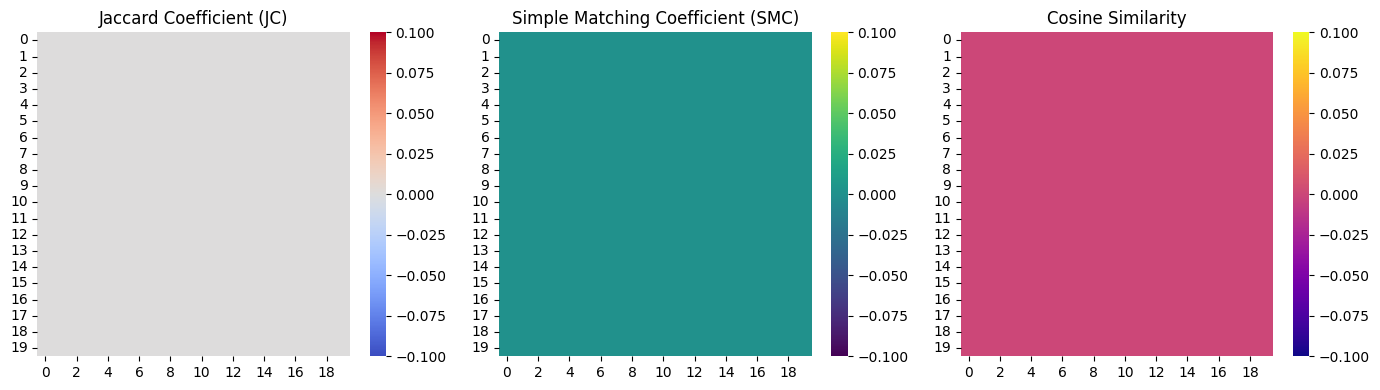

In [ ]:
# =============================== #
#         A7: JC, SMC, and Cosine Similarity Heatmaps (First 20 Binary Vectors)
# =============================== #
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import dot
from numpy.linalg import norm

file_path = r"Lab Session Data(thyroid0387_UCI).csv"
df = pd.read_csv(file_path)
df_binary = df.select_dtypes(include='number').copy()
binary_cols = [col for col in df_binary.columns if set(df_binary[col].dropna().unique()).issubset({0, 1})]
df_binary = df_binary[binary_cols].iloc[:20]  # Use first 20 observations only

n = len(df_binary)
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cos_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        vec1 = df_binary.iloc[i]
        vec2 = df_binary.iloc[j]
        f11 = np.sum((vec1 == 1) & (vec2 == 1))
        f00 = np.sum((vec1 == 0) & (vec2 == 0))
        f10 = np.sum((vec1 == 1) & (vec2 == 0))
        f01 = np.sum((vec1 == 0) & (vec2 == 1))
        jc = f11 / (f11 + f10 + f01) if (f11 + f10 + f01) != 0 else 0
        smc = (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0
        cos = dot(vec1, vec2) / (norm(vec1) * norm(vec2)) if norm(vec1) * norm(vec2) != 0 else 0
        jc_matrix[i][j] = jc
        smc_matrix[i][j] = smc
        cos_matrix[i][j] = cos

plt.figure(figsize=(14, 4))
plt.subplot(1, 3, 1)
sns.heatmap(jc_matrix, annot=False, cmap='coolwarm')
plt.title("Jaccard Coefficient (JC)")
plt.subplot(1, 3, 2)
sns.heatmap(smc_matrix, annot=False, cmap='viridis')
plt.title("Simple Matching Coefficient (SMC)")
plt.subplot(1, 3, 3)
sns.heatmap(cos_matrix, annot=False, cmap='plasma')
plt.title("Cosine Similarity")
plt.tight_layout()
plt.show()


In [ ]:
# =============================== #
#         A8: Imputing Missing Values (Numeric & Categorical)
# =============================== #
import pandas as pd
import numpy as np

file_path = r"Lab Session Data(thyroid0387_UCI).csv"
df = pd.read_csv(file_path)

num_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in num_cols:
    if df[col].isnull().sum() > 0:
        if df[col].skew() < 1:  # No strong skew → mean
            df[col].fillna(df[col].mean(), inplace=True)
        else:  # Skewed → median
            df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\n✅ Missing values imputed successfully.")
print(df.isnull().sum())



✅ Missing values imputed successfully.
Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0

In [ ]:
# =============================== #
#         A9: Data Normalization (Min-Max Scaling)
# =============================== #
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

file_path = r"Lab Session Data(thyroid0387_UCI).csv"
df = pd.read_csv(file_path)

numeric_cols = df.select_dtypes(include='number').columns
df_numeric = df[numeric_cols].copy()

scaler = MinMaxScaler()  # or use StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)
print("\n🔄 Normalized Data Preview:")
print(df_scaled.head())



🔄 Normalized Data Preview:
      Record ID       age
0  0.000000e+00  0.000427
1  3.410871e-08  0.000427
2  9.891527e-07  0.000610
3  6.934301e-05  0.000534
4  6.937712e-05  0.000473
